In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
races = pd.read_csv('./data_files/races.csv')
qualifying = pd.read_csv('./data_files/qualifying.csv')

Bahrain 2022

In [3]:
races_22 = races[races['year'] ==2022]
races_22 = races_22[:1]
races_22

,raceId,year,round,circuitId,name,date,time,url
1036,1074,2022,1,3,Bahrain Grand Prix,20/03/22,15:00:00,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...


Bahrain in 2021

In [4]:
races_21 = races[races['year'] ==2021]
races_21 = races_21[races_21['circuitId'].isin(races_22['circuitId'])]
races_21

,raceId,year,round,circuitId,name,date,time,url
1037,1052,2021,1,3,Bahrain Grand Prix,28/03/21,15:00:00,http://en.wikipedia.org/wiki/2021_Bahrain_Gran...


In [5]:
qualifying_22 = qualifying[qualifying['raceId'].isin(races_22['raceId'])]
qualifying_22.reset_index(inplace=True)
qualifying_22.drop(columns='index', inplace=True)

c:\Users\sreno\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
qualifying_21= qualifying[qualifying['raceId'].isin(races_21['raceId'])]
qualifying_21.reset_index(inplace=True)
qualifying_21.drop(columns='index', inplace=True)

In [7]:
qualifying_21.replace({'\\N': 0}, inplace=True)
qualifying_22.replace({'\\N': 0}, inplace=True)

c:\Users\sreno\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
qualifying_21

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,8735,1052,830,9,33,1,1:30.499,1:30.318,1:28.997
1,8736,1052,1,131,44,2,1:30.617,1:30.085,1:29.385
2,8737,1052,822,131,77,3,1:31.200,1:30.186,1:29.586
3,8738,1052,844,6,16,4,1:30.691,1:30.010,1:29.678
4,8739,1052,842,213,10,5,1:30.848,1:30.513,1:29.809
5,8740,1052,817,1,3,6,1:30.795,1:30.222,1:29.927
6,8741,1052,846,1,4,7,1:30.902,1:30.099,1:29.974
7,8742,1052,832,6,55,8,1:31.653,1:30.009,1:30.215
8,8743,1052,4,214,14,9,1:30.863,1:30.595,1:30.249
9,8744,1052,840,117,18,10,1:31.261,1:30.624,1:30.601


2022 Race qual times from min to milliseconds (better for graphing)

In [9]:
q1 = []
for time in qualifying_22['q1']:
    min_seconds = int(time[0]) * 60  
    seconds = int(time[2:4]) + min_seconds
    milli = (seconds  * 1000) + int(time[-3:])
    q1.append(milli)

In [10]:
q2 = []
for time in qualifying_22['q2']:
    if time == 0:
        q2.append(0)
    else:
        min_seconds = int(time[0]) * 60  
        seconds = int(time[2:4]) + min_seconds
        milli = (seconds  * 1000) + int(time[-3:])
        q2.append(milli)

In [11]:
q3 = []
for time in qualifying_22['q3']:
    if time == 0:
        q3.append(0)
    else:
        min_seconds = int(time[0]) * 60  
        seconds = int(time[2:4]) + min_seconds
        milli = (seconds  * 1000) + int(time[-3:])
        q3.append(milli)

In [12]:
qualifying_22.drop(columns=['q1', 'q2','q3'], inplace=True)

c:\Users\sreno\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
qualifying_22['q1'] = q1
qualifying_22['q2'] = q2
qualifying_22['q3'] = q3

<ipython-input-13-0c1e2fe9fb6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_22['q1'] = q1
<ipython-input-13-0c1e2fe9fb6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_22['q2'] = q2
<ipython-input-13-0c1e2fe9fb6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [14]:
q1 = []
for time in qualifying_21['q1']:
    min_seconds = int(time[0]) * 60  
    seconds = int(time[2:4]) + min_seconds
    milli = (seconds  * 1000) + int(time[-3:])
    q1.append(milli)

In [15]:
q2 = []
for time in qualifying_21['q2']:
    if time == 0:
        q2.append(0)
    else:
        min_seconds = int(time[0]) * 60  
        seconds = int(time[2:4]) + min_seconds
        milli = (seconds  * 1000) + int(time[-3:])
        q2.append(milli)

In [16]:
q3 = []
for time in qualifying_21['q3']:
    if time == 0:
        q3.append(0)
    else:
        min_seconds = int(time[0]) * 60  
        seconds = int(time[2:4]) + min_seconds
        milli = (seconds  * 1000) + int(time[-3:])
        q3.append(milli)

In [17]:
qualifying_21.drop(columns=['q1', 'q2','q3'], inplace=True)

In [18]:
qualifying_21['q1'] = q1
qualifying_21['q2'] = q2
qualifying_21['q3'] = q3

<ipython-input-18-198ed94834fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_21['q1'] = q1
<ipython-input-18-198ed94834fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_21['q2'] = q2
<ipython-input-18-198ed94834fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

### Since the Drivers change almost every year in formula one its easier to compare how the cars have changed to do so i will need the 10 team names instead of the constructor IDs

In [19]:
constructors = pd.read_csv('./data_files/constructors.csv')

In [20]:
constructors = constructors[constructors['constructorId'].isin(qualifying_21['constructorId'])]

In [21]:
constructors= constructors.set_index('constructorId')

In [22]:
team_names = constructors['name'].to_dict()

In [23]:
qualifying_22['constructorId'].replace(team_names, inplace= True)
qualifying_21['constructorId'].replace(team_names, inplace= True)

c:\Users\sreno\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [24]:
qualifying_21

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,8735,1052,830,Red Bull,33,1,90499,90318,88997
1,8736,1052,1,Mercedes,44,2,90617,90085,89385
2,8737,1052,822,Mercedes,77,3,91200,90186,89586
3,8738,1052,844,Ferrari,16,4,90691,90010,89678
4,8739,1052,842,AlphaTauri,10,5,90848,90513,89809
5,8740,1052,817,McLaren,3,6,90795,90222,89927
6,8741,1052,846,McLaren,4,7,90902,90099,89974
7,8742,1052,832,Ferrari,55,8,91653,90009,90215
8,8743,1052,4,Alpine F1 Team,14,9,90863,90595,90249
9,8744,1052,840,Aston Martin,18,10,91261,90624,90601


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


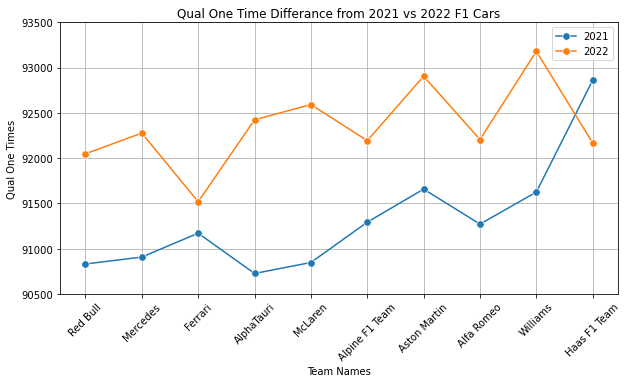

In [25]:
plt.figure(figsize=(10,5))
bar = sns.lineplot('constructorId', 'q1', data=qualifying_21, marker='.', markersize=15, ci=None, label = 2021)
bar2 = sns.lineplot('constructorId', 'q1', data=qualifying_22, marker='.', markersize=15, ci=None, label = 2022)
plt.xticks(rotation=45)
plt.ylim(90500, 93500)
plt.ylabel('Qual One Times')
plt.xlabel('Team Names')
plt.title('Qual One Time Differance from 2021 vs 2022 F1 Cars')
plt.grid()
plt.show()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


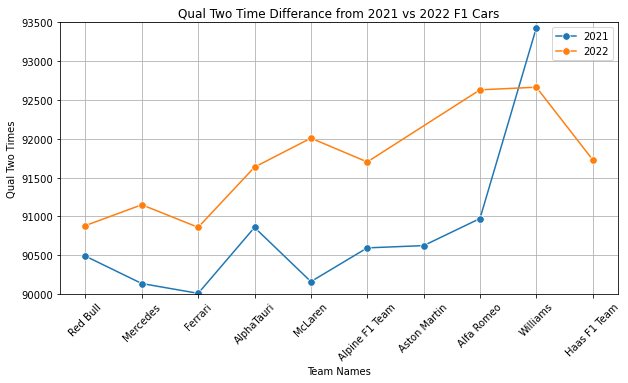

In [26]:
plt.figure(figsize=(10,5))
bar = sns.lineplot('constructorId', 'q2', data=qualifying_21[:-5], marker='.', markersize=15, ci=None, label = 2021)
bar2 = sns.lineplot('constructorId', 'q2', data=qualifying_22[:-5], marker='.', markersize=15, ci=None, label = 2022)
plt.xticks(rotation=45)
plt.ylim(90000, 93500)
plt.ylabel('Qual Two Times')
plt.xlabel('Team Names')
plt.title('Qual Two Time Differance from 2021 vs 2022 F1 Cars')
plt.grid()
plt.show()

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


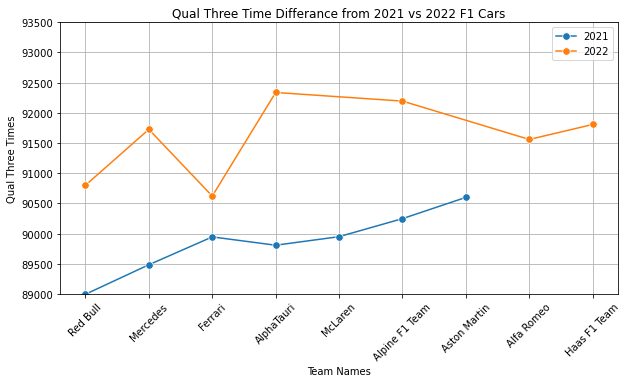

In [28]:
plt.figure(figsize=(10,5))
bar = sns.lineplot('constructorId', 'q3', data=qualifying_21[:-10], marker='.', markersize=15, ci=None, label = 2021)
bar2 = sns.lineplot('constructorId', 'q3', data=qualifying_22[:-10], marker='.', markersize=15, ci=None, label = 2022)
plt.xticks(rotation=45)
plt.ylim(89000, 93500)
plt.ylabel('Qual Three Times')
plt.xlabel('Team Names')
plt.title('Qual Three Time Differance from 2021 vs 2022 F1 Cars')
plt.grid()
plt.show()